In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  confusion_matrix, classification_report
from sklearn.model_selection import  train_test_split


In [13]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv("h1b_cleaned_encoded.csv")

C:\Users\thakk\AppData\Local\Temp\ipykernel_24520\4239751877.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("h1b_cleaned_encoded.csv")


In [15]:
df = df.drop(columns=['COUNTRY_OF_CITIZENSHIP'])

In [16]:
def clean_naics(row):

    naics = str(row['NAICS_CODE'])
    new_naics = []
    for char in naics:
        if char == '-':
            pass
        else:
            new_naics.append(char)
    return ''.join(new_naics)



In [17]:
df['NAICS_CODE'] = df.apply(clean_naics,axis=1)

In [18]:
X = df.drop('target', axis=1)
y = df['target']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [20]:
rf_classifier_1 = RandomForestClassifier()

rf_classifier_1.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
predictions_1 = rf_classifier_1.predict(X_test)

In [36]:
cl_report = classification_report(y_test,predictions_1)

In [38]:
print(cl_report)

              precision    recall  f1-score   support

           0       0.46      0.06      0.11       638
           1       0.98      1.00      0.99     26472

    accuracy                           0.98     27110
   macro avg       0.72      0.53      0.55     27110
weighted avg       0.97      0.98      0.97     27110



### Results are not great for class 0 i.e h1b denied. Let's look at feature importances and use only important feature and check if there is any improvement in results.

In [26]:
feature_importance = pd.DataFrame({"Feature":X.columns,"Importance":rf_classifier_1.feature_importances_}).sort_values("Importance",ascending=False)

<Axes: xlabel='Importance', ylabel='Feature'>

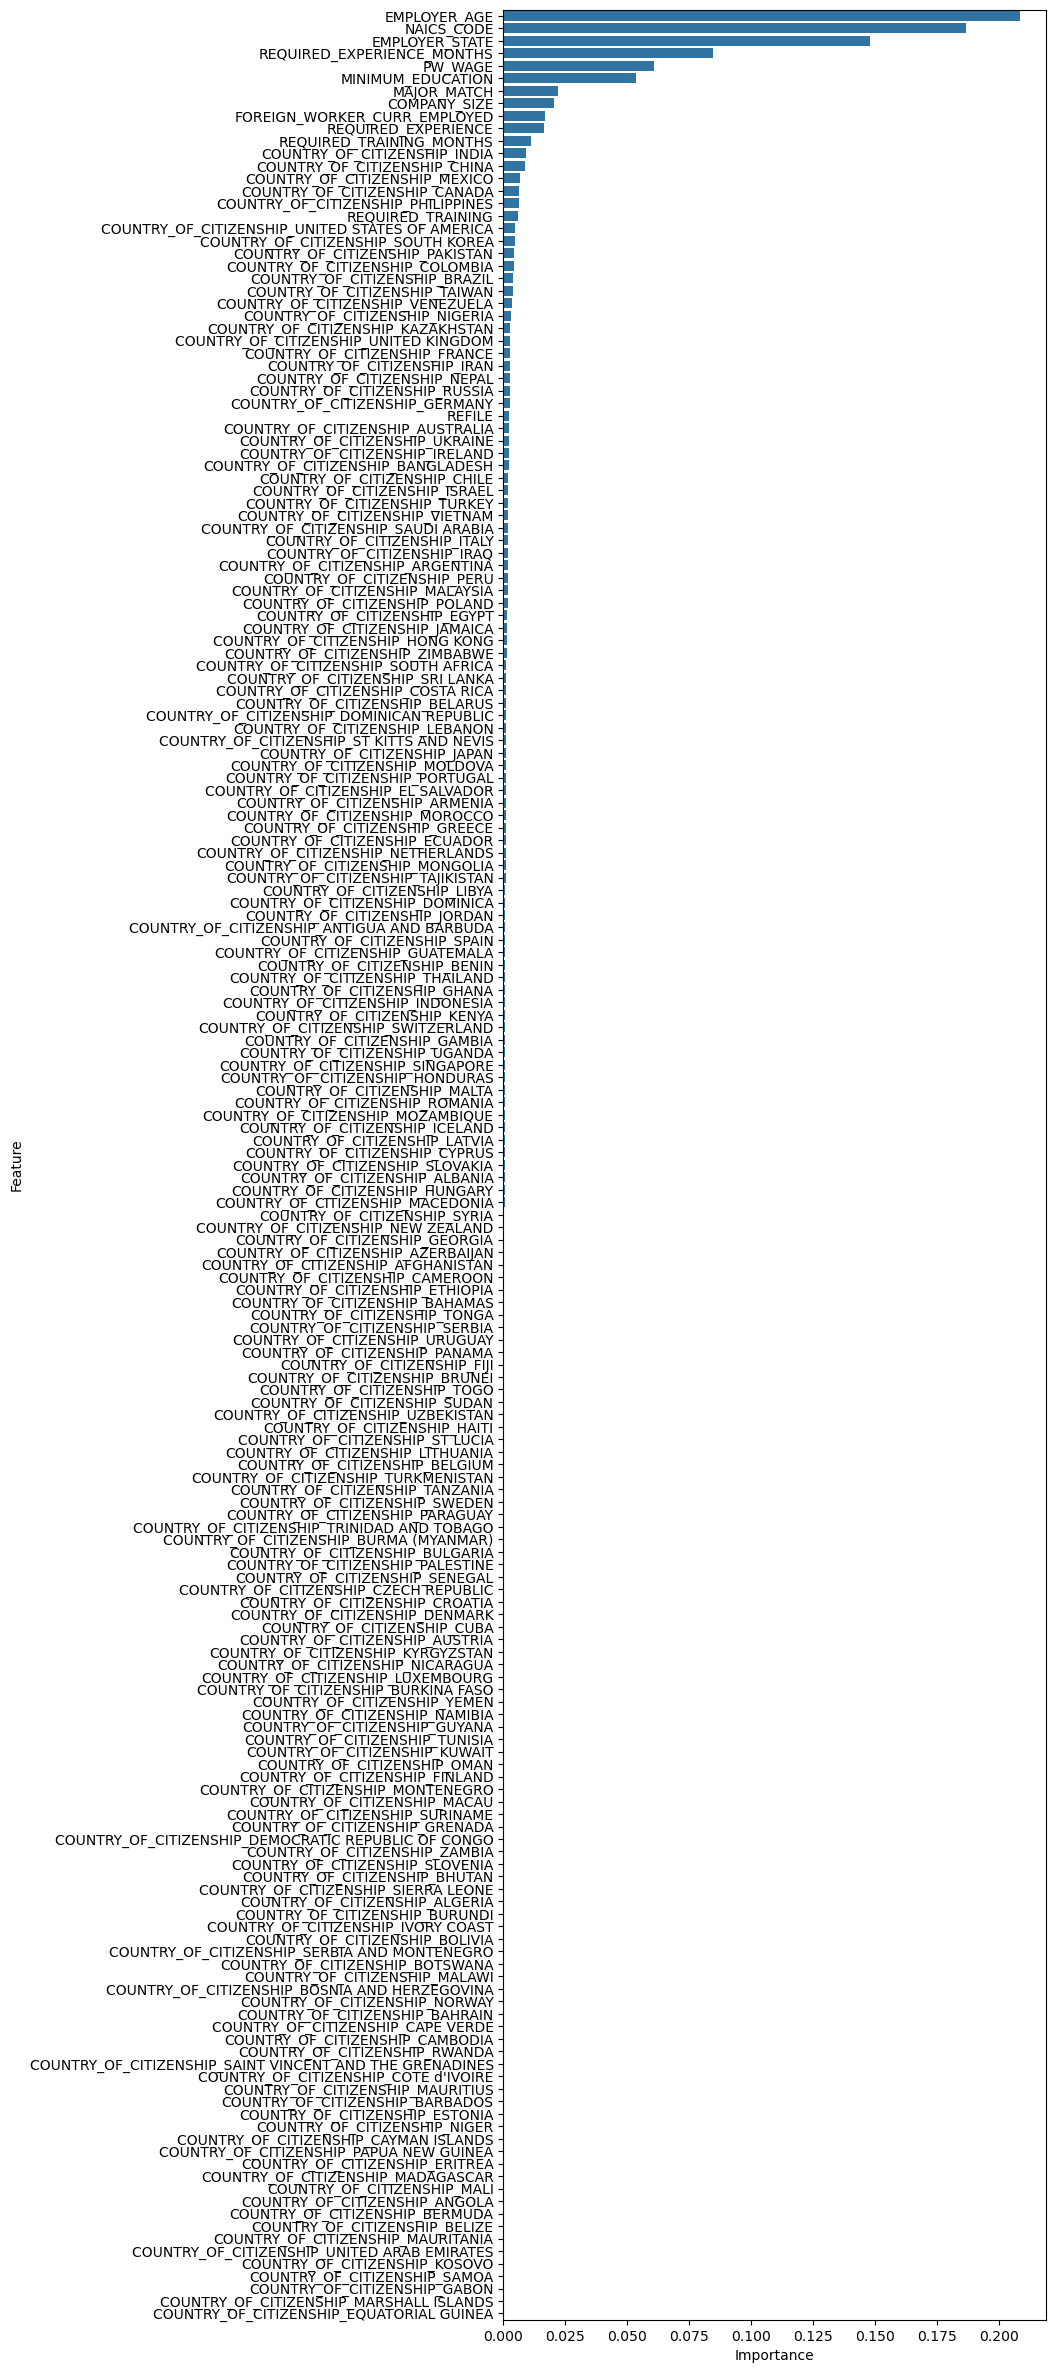

In [31]:
plt.figure(figsize=(7, 30))
sns.barplot(x='Importance',y='Feature',data=feature_importance)

In [43]:
important_features = feature_importance[feature_importance['Importance']>0.025].Feature.values

In [45]:
X_imp = df[important_features]

In [52]:
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imp, y, test_size=0.3,random_state=101)

In [48]:
rf_classifier_2 = RandomForestClassifier()

rf_classifier_2.fit(X_train_imp,y_train_imp)

RandomForestClassifier()

In [49]:
predictions_2 = rf_classifier_2.predict(X_test_imp)

In [50]:
cl_report_2 = classification_report(y_test_imp,predictions_2)

In [51]:
print(cl_report_2)

              precision    recall  f1-score   support

           0       0.39      0.07      0.12       650
           1       0.98      1.00      0.99     26460

    accuracy                           0.98     27110
   macro avg       0.68      0.53      0.55     27110
weighted avg       0.96      0.98      0.97     27110



### Results are still bad for class 0 and skewed towards class 1. 
